In [ ]:
import requests 
import pandas as pd
import seaborn as sns
apiKey = '87983fbe976988a9e22330ebf030a1ae'
url = 'https://api.themoviedb.org/3/movie/top_rated?api_key=87983fbe976988a9e22330ebf030a1ae&page={0}'
req = requests.get(url)
json = req.json()

In [ ]:
def requestAllRevs2():
    ids2=[]
    pageNum = 1
    while True:
        r = requests.get(f"https://api.themoviedb.org/3/movie/top_rated?api_key=87983fbe976988a9e22330ebf030a1ae&sort_by=revene.desc&page={pageNum}")
        pageNum += 1
        rJson = r.json()
        if not r.ok or pageNum >= 10:
            return ids2
        for i in rJson['results']:
            ids2.append(i['id'])
ids2 = requestAllRevs2()

In [ ]:
def getMovieDetails2():
    movieDetails = []
    for i in ids2:
        movieDetail = {}
        r = requests.get(f"https://api.themoviedb.org/3/movie/{i}?api_key=87983fbe976988a9e22330ebf030a1ae&language=en-US")
        rJson = r.json()
        movieDetail['title'] = rJson['title']
        movieDetails.append(movieDetail)
        movieDetail['money'] = rJson['revenue']
        movieDetails.append(movieDetail)
        #print(movieDetail1)
    return movieDetails
titles2 = getMovieDetails2()

In [ ]:
df = pd.DataFrame(titles2)

In [ ]:
top = df.sort_values(by='money', ascending=False)

In [18]:
top20 = top[:20]

In [19]:
top20

,title,money
185,Avengers: Endgame,2797800564
184,Avengers: Endgame,2797800564
192,Avengers: Infinity War,2046239637
193,Avengers: Infinity War,2046239637
126,Top Gun: Maverick,1488000000
127,Top Gun: Maverick,1488000000
40,The Lord of the Rings: The Return of the King,1118888979
41,The Lord of the Rings: The Return of the King,1118888979
312,Joker,1074251311
313,Joker,1074251311


<AxesSubplot:xlabel='money', ylabel='title'>

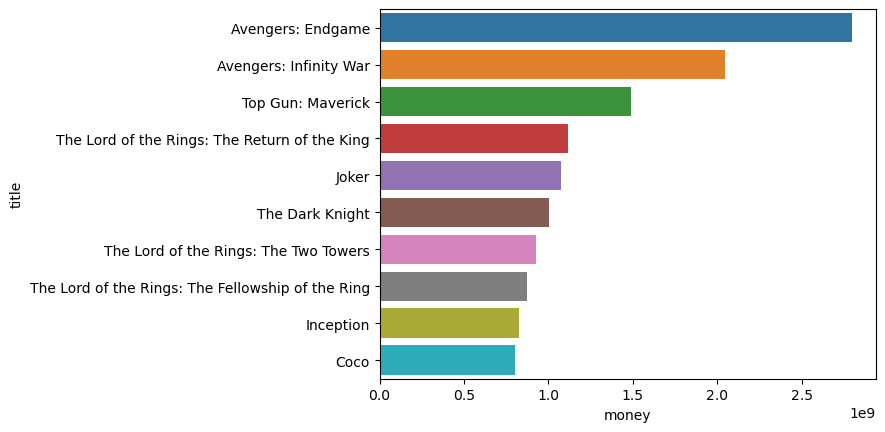

In [20]:
sns.barplot(data= top20,x = 'money', y = 'title', )

In [17]:
directors = ["Joe Russo", "Joe Russo", "Joe Russo", "Joe Russo","Joseph Kosinski","Joseph Kosinski","Peter Jackson","Peter Jackson","Todd Philups","Todd Philups", "Christopher Nolan","Christopher Nolan","Peter Jackson","Peter Jackson","Peter Jackson","Peter Jackson","Christopher Nolan","Christopher","adrian molina","adrian molina"]
top20.insert(1,"Directors",directors)

ValueError: cannot insert Directors, already exists

In [16]:
top20

,title,Directors,money
185,Avengers: Endgame,Joe Russo,2797800564
184,Avengers: Endgame,Joe Russo,2797800564
192,Avengers: Infinity War,Joe Russo,2046239637
193,Avengers: Infinity War,Joe Russo,2046239637
126,Top Gun: Maverick,Joseph Kosinski,1488000000
127,Top Gun: Maverick,Joseph Kosinski,1488000000
40,The Lord of the Rings: The Return of the King,Peter Jackson,1118888979
41,The Lord of the Rings: The Return of the King,Peter Jackson,1118888979
312,Joker,Todd Philups,1074251311
313,Joker,Todd Philups,1074251311


<AxesSubplot:xlabel='money', ylabel='Directors'>

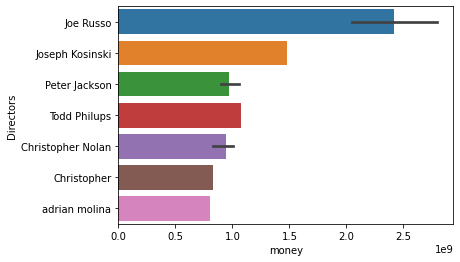

In [22]:
sns.barplot(data= top20,x = 'money', y = 'Directors', ) # average